# Säljrapport

*Förslag på rapportstruktur*

## Introduktion

Här skriver vi en kort introduktion. 

In [1]:
from src.io_utils import load_data, clean_data, save_data
# Load
df_raw = load_data("data/ecommerce_sales.csv")

# Clean
df_clean = clean_data(df_raw)

# Save
save_data(df_clean, "data/clean_data.csv")

df_clean.head()

,order_id,date,city,category,price,units,revenue,month,week
1847,101847,2024-01-01,Stockholm,Clothing,309.63,6,1857.78,2024-01-01,2024-01-01
120,100120,2024-01-01,Malmö,Home,502.33,2,1004.66,2024-01-01,2024-01-01
609,100609,2024-01-01,Malmö,Clothing,480.18,3,1440.54,2024-01-01,2024-01-01
516,100516,2024-01-01,Västerås,Electronics,1037.70,4,4150.80,2024-01-01,2024-01-01
1939,101939,2024-01-01,Göteborg,Sports,315.92,7,2211.44,2024-01-01,2024-01-01


## Nyckeltal

Här visualiserar vi våra nyckeltal.

### 1. Vad säljer? – vilka kategorier driver mest intäkt?

**Nyckeltal:** Total intäkt och totalt antal enheter & Intäkt per kategori

### 2. Var säljer vi? – vilka städer står för störst intäkt?

**Nyckeltal:** Intäkt per stad 

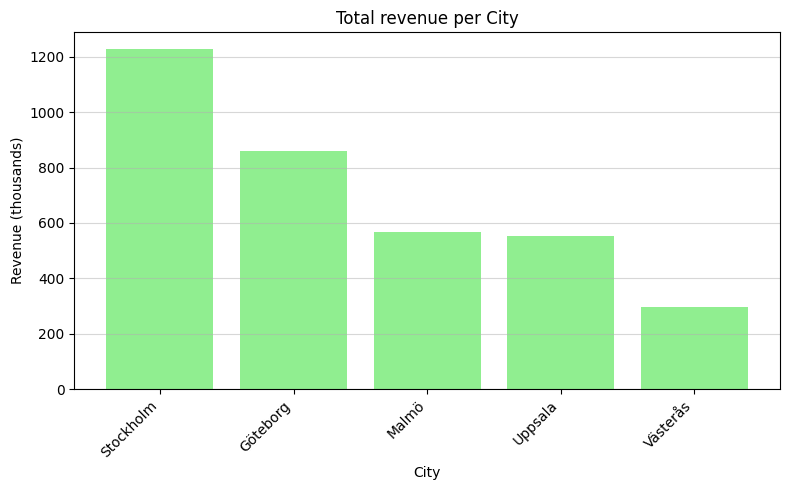

In [2]:
from src.metrics import revenue_per_city
from src.viz import plot_tot_revenue_per_city

revenue_city = revenue_per_city(df_clean)

plot_tot_revenue_per_city(df_clean)

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?

 **Nyckeltal:** TBD

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.

**Nyckeltal:** AOV (Average Order Value)

c:\Users\Belson\Desktop\Gruppuppgift\src\metrics.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply((lambda x: x["revenue"].sum() / x["order_id"].nunique()), include_groups=True)
c:\Users\Belson\Desktop\Gruppuppgift\src\metrics.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_aov = (df.groupby("category")
c:\Users\Belson\Desktop\Gruppuppgift\src\metrics.py:59: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of panda

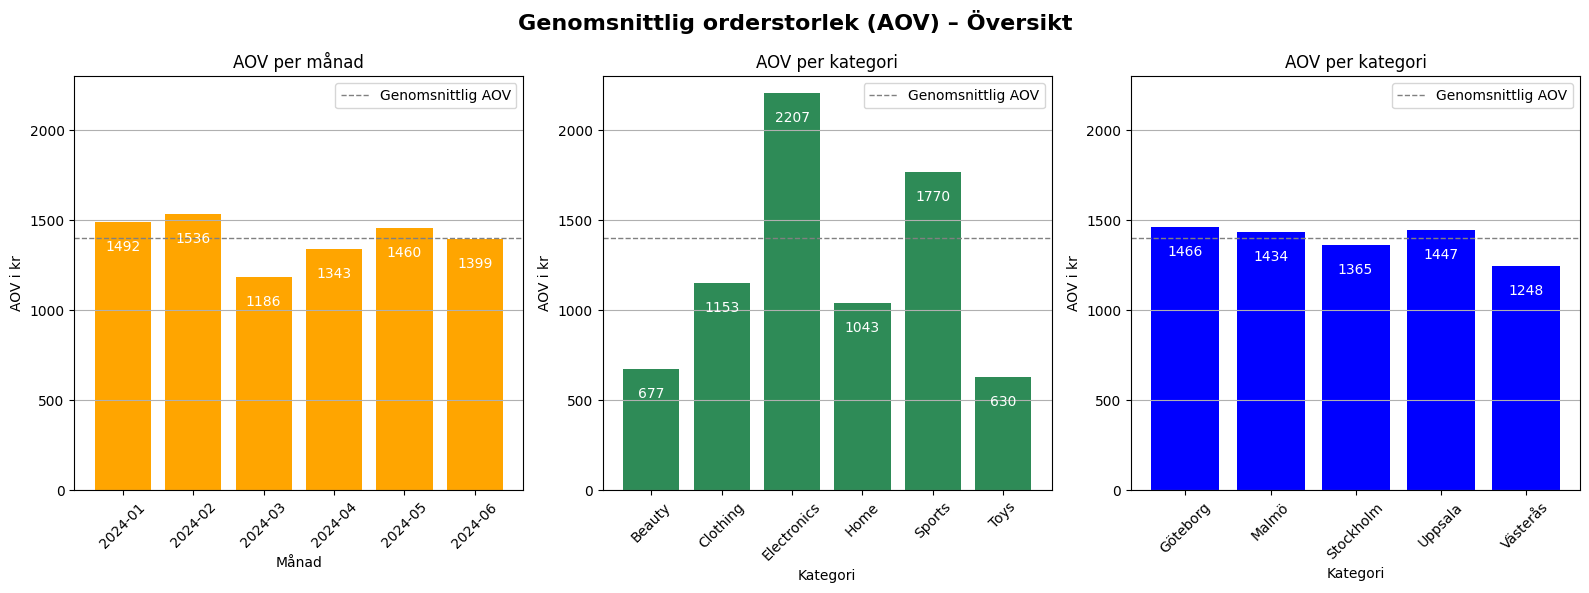

In [3]:
# WIP

from src.viz import plot_aov_figure
plot_aov_figure(df_clean)

### 5. Topp-listor – topp-3 kategorier efter intäkt.

**Nyckeltal:** Top-3 kategorier efter intäkt

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?

*Insikter om avvikelser som går att utläsa från sammanställning av datan ovan*

## Rekommendationer

Avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.